### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
import statsmodels.api as sm # 쓰지는 않는다.
import sklearn as sk

#한글/차트 마이너스 없애기

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### MNIST 다운로드

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data 
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

In [6]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()
    
    xlabels = label[0:nrow*ncol]
    
    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])
    
    plt.tight_layout()
    plt.show()

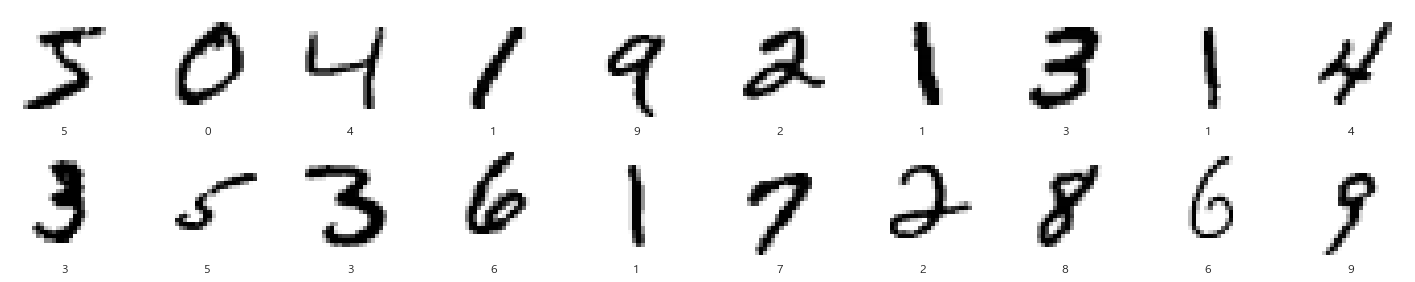

In [7]:
show_images(train_input, train_target, 2, 10)

In [8]:
model = keras.Sequential(name='CNN')
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 1000)              3137000 

In [9]:
# 255.0 나눠서 0~1로 값 축소하는 일은 하지 않는다
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model2.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target),
                    batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9566
Epoch 1: val_loss improved from inf to 5.38893, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 49s 81ms/step - loss: 0.1411 - accuracy: 0.9566 - val_loss: 5.3889 - val_accuracy: 0.9870
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9867
Epoch 2: val_loss did not improve from 5.38893
600/600 [==============================] - 52s 87ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 5.6788 - val_accuracy: 0.9894
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9905
Epoch 3: val_loss improved from 5.38893 to 4.23729, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 57s 95ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 4.2373 - val_accuracy: 0.9910
Epoch 4/20
600/600 [==============================] - ETA: 0s - loss: 0.0210 - acc

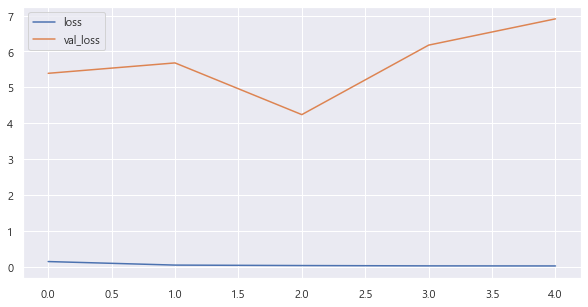

In [10]:
plot_target = ['loss', 'val_loss']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

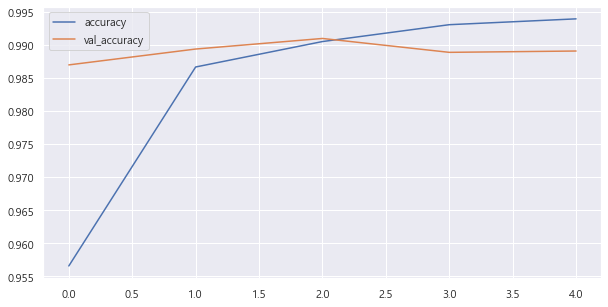

In [11]:
plot_target = [ 'accuracy', 'val_accuracy']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [12]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 4.2373 - accuracy: 0.9910


[4.237288475036621, 0.9909999966621399]

In [13]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 3s 10ms/step


In [14]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측 실패한 이미지를 파악한다

In [15]:
wrong_result = []
for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)
    
    
len(wrong_result)

90

In [16]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

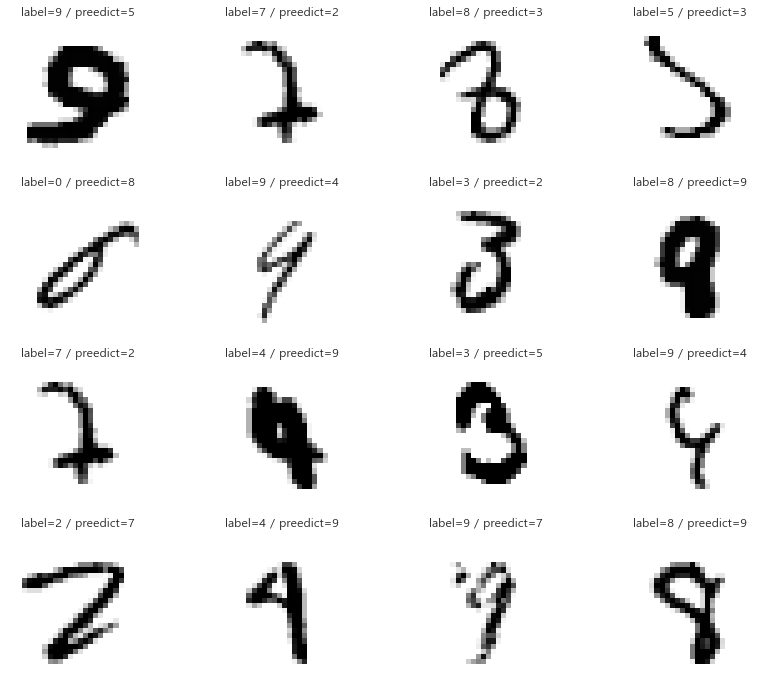

In [17]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / preedict={pred_labels[n]}')
    plt.axis('off')
    
plt.show()